## Task 1

In [ ]:
# Imports

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2
import seaborn as sns




In [19]:
#Load data

dataSk = loadmat("data/T1_data_Sk_Gaussian.mat")
dataBPSK = loadmat("data/T1_data_Sk_BPSK.mat")
dataH0 = loadmat("data/T3_data_x_H0.mat")
dataH1 = loadmat("data/T3_data_x_H1.mat")
dataSigmaW = loadmat("data/T3_data_sigma_w.mat")
dataSigmaS = loadmat("data/T3_data_sigma_s.mat")
dataNumExp = loadmat("data/T8_numerical_experiment.mat")

sk = dataSk['T1_data_Sk_Gaussian']
bpsk = dataBPSK["T1_data_Sk_BPSK"]
h0 = dataH0["T3_data_x_H0"]
h1 = dataH1["T3_data_x_H1"]
sigmaW = dataSigmaW["w"]
sigmaS = dataSigmaS["s_t"]
numExp = dataNumExp["T8_numerical_experiment"]


In [20]:
N = len(sk)
sn = np.zeros(N,  dtype=complex)
comp = np.imag(0)

c = complex(0, 1)

comp = 0
for n in range(N):
    for k in range(N):
        comp += 1/np.sqrt(1024) * (sk[k] * np.exp((c * 2 * np.pi * k * n)/ 1024))
    sn[n] = comp
    comp = np.imag(0)

covariance = np.cov(sn)



C:\Users\jakob\AppData\Local\Temp\ipykernel_32468\610799933.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sn[n] = comp


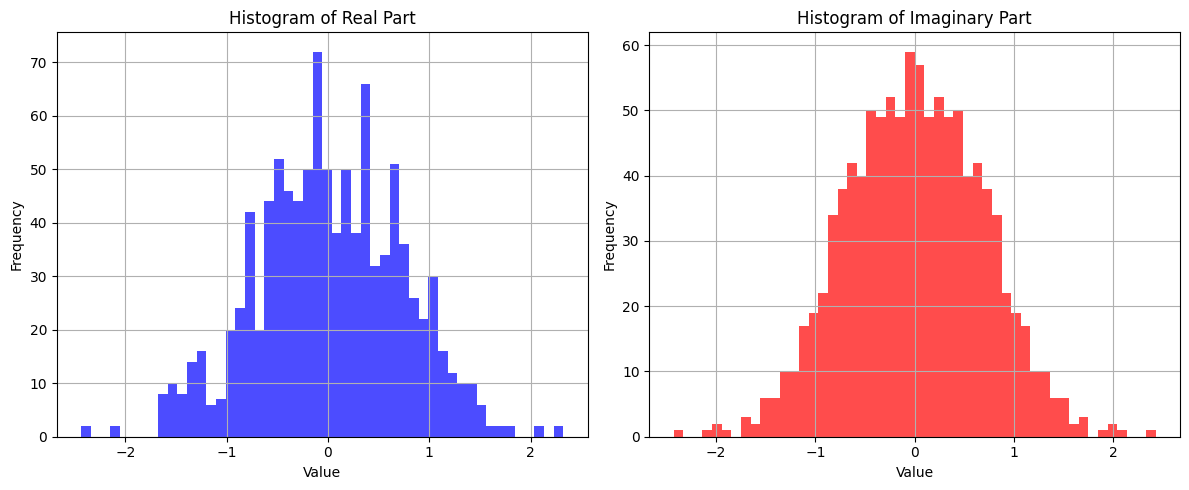

In [21]:
# Plotting sn values from Sk_Gaussian-dataset

snReal = sn.real.flatten()
snImag = sn.imag.flatten()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(snReal, bins=50, color='blue', alpha=0.7)
ax[0].set_title("Histogram of Real Part")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Frequency")
ax[0].grid(True)

ax[1].hist(snImag, bins=50, color='red', alpha=0.7)
ax[1].set_title("Histogram of Imaginary Part")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Frequency")
ax[1].grid(True)

plt.tight_layout() 
plt.show()

In [22]:
N = len(sk)
snBpsk = np.fft.ifft(bpsk, axis=1) * np.sqrt(N)

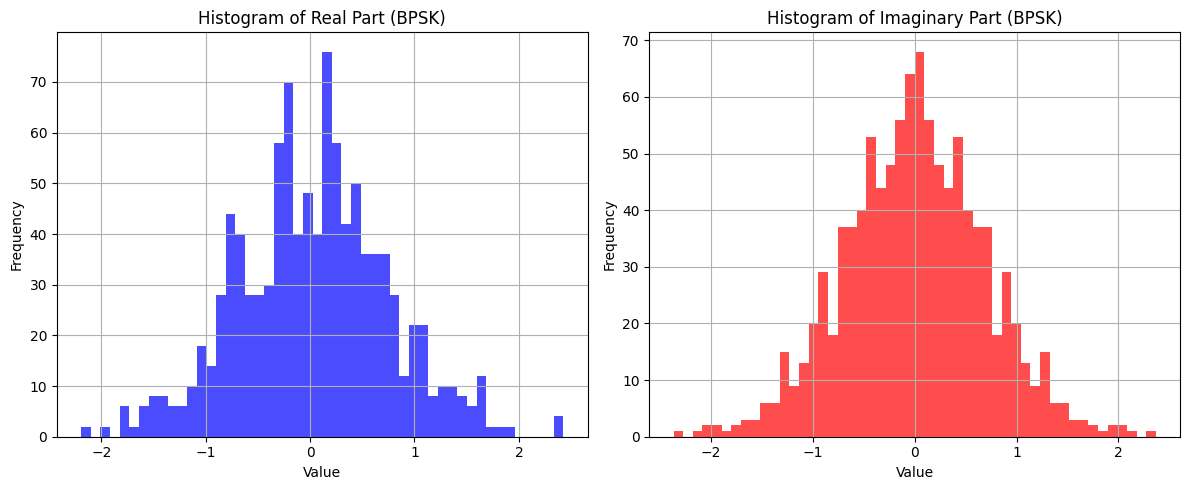

In [23]:
# Plotting sn values from Sk_BPSK-dataset

snBPSKReal = snBpsk.real.flatten()
snBPSKImag = snBpsk.imag.flatten()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(snBPSKReal, bins=50, color='blue', alpha=0.7)
ax[0].set_title("Histogram of Real Part (BPSK)")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Frequency")
ax[0].grid(True)

ax[1].hist(snBPSKImag, bins=50, color='red', alpha=0.7)
ax[1].set_title("Histogram of Imaginary Part (BPSK)")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Frequency")
ax[1].grid(True)

plt.tight_layout()
plt.show()

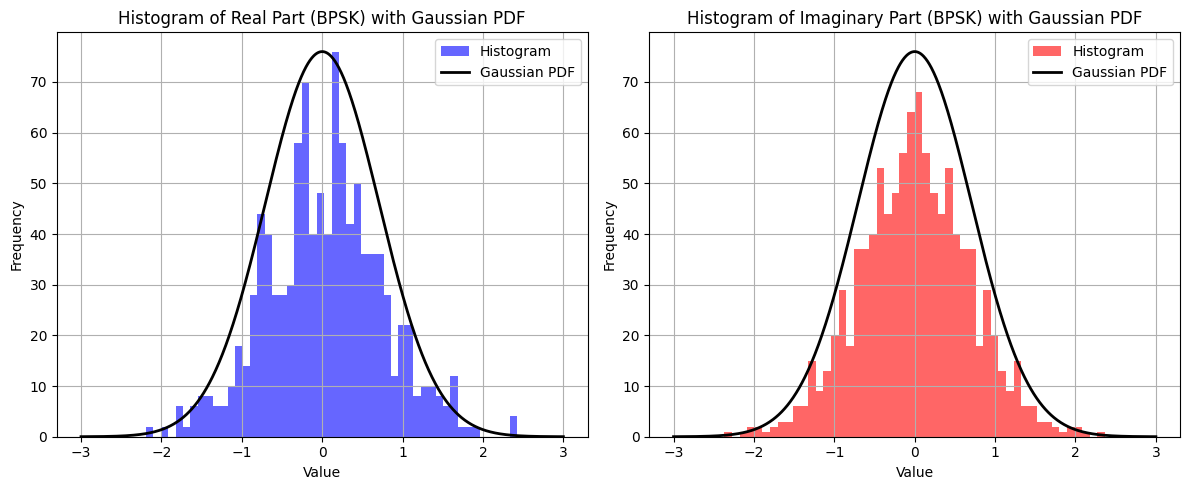

In [24]:
## Plotting bell-curve

# Compute the Gaussian PDF parameters
mu = 0  # Zero mean
sigma_sq = 1/2  # Variance = 1/2
sigma = np.sqrt(sigma_sq)  # Standard deviation

# Generate x-values for plotting the Gaussian curve
x_values = np.linspace(-3, 3, 1000)  # Adjust range if needed
gaussian_pdf = norm.pdf(x_values, mu, sigma)  # Compute theoretical Gaussian PDF

# Compute a proper scaling factor
hist_real, bin_edges_real = np.histogram(snBPSKReal, bins=50, density=False)  # Get histogram values
hist_imag, bin_edges_imag = np.histogram(snBPSKImag, bins=50, density=False)  # Get histogram values

max_hist_height = max(max(hist_real), max(hist_imag))  # Get the highest histogram bin
gaussian_pdf *= max_hist_height / max(gaussian_pdf)  # Scale the PDF to match histogram height

# Create the histograms with adjusted Gaussian overlays
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for real part (BPSK)
ax[0].hist(snBPSKReal, bins=50, color='blue', alpha=0.6, density=False, label="Histogram")
ax[0].plot(x_values, gaussian_pdf, 'k-', lw=2, label="Gaussian PDF")
ax[0].set_title("Histogram of Real Part (BPSK) with Gaussian PDF")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Frequency")
ax[0].legend()
ax[0].grid(True)

# Plot histogram for imaginary part (BPSK)
ax[1].hist(snBPSKImag, bins=50, color='red', alpha=0.6, density=False, label="Histogram")
ax[1].plot(x_values, gaussian_pdf, 'k-', lw=2, label="Gaussian PDF")
ax[1].set_title("Histogram of Imaginary Part (BPSK) with Gaussian PDF")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Frequency")
ax[1].legend()
ax[1].grid(True)

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

In [25]:
product = snReal * snReal

# Var[x] = E[X**2] - E[x]**2, where E[x] = 0. So it makes sense

print(np.mean(product))

0.5199078752280909


## Task 3

In [26]:
sigmaW = np.var(sigmaW)
sigmaS = np.var(sigmaS)

imagH0 = np.imag(h0)
realH0 = np.real(h0)

imagH1 = np.imag(h1)
realH1 = np.real(h1)

chiH0 = np.zeros(1024, dtype= complex)
chiH1 = np.zeros(1024, dtype= complex)

for i in range(len(h0)):
    chiH0[i] = (1/sigmaW) * 2 *(imagH0[i]**2 + realH0[i]**2)

for i in range(len(h1)):
    chiH1[i] = (1/(sigmaW + sigmaS)) * 2 * (imagH1[i]**2 + realH1[i]**2)

C:\Users\jakob\AppData\Local\Temp\ipykernel_32468\444742834.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chiH0[i] = (1/sigmaW) * 2 *(imagH0[i]**2 + realH0[i]**2)
C:\Users\jakob\AppData\Local\Temp\ipykernel_32468\444742834.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chiH1[i] = (1/(sigmaW + sigmaS)) * 2 * (imagH1[i]**2 + realH1[i]**2)


C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:884: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


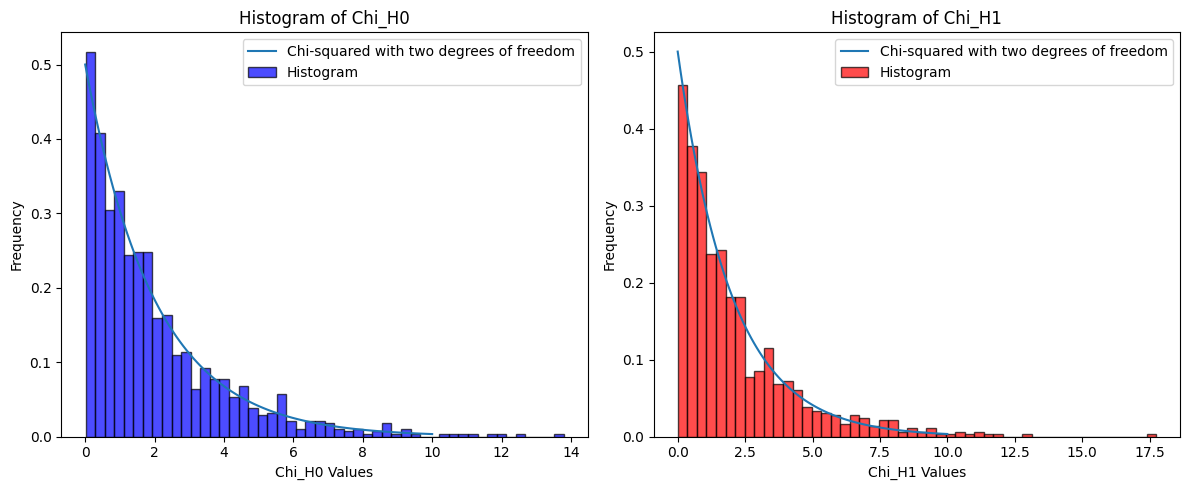

In [27]:
x = np.linspace(0, 10, 100)
H0Pdf = chi2.pdf(x, 2)
H1Pdf = chi2.pdf(x, 2)


#Plot the histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(chiH0, bins=50, color='b', alpha=0.7, edgecolor='black', density=True)
plt.xlabel("Chi_H0 Values")
plt.ylabel("Frequency")
plt.plot(x, H0Pdf)
plt.legend(["Chi-squared with two degrees of freedom", "Histogram"])
plt.title("Histogram of Chi_H0")

plt.subplot(1, 2, 2)
plt.hist(chiH1, bins=50, color='r', alpha=0.7, edgecolor='black', density=True)
plt.plot(x, H0Pdf)
plt.legend(["Chi-squared with two degrees of freedom", "Histogram"])
plt.xlabel("Chi_H1 Values") 
plt.ylabel("Frequency")
plt.title("Histogram of Chi_H1")
plt.tight_layout()
plt.show()

In [28]:
lam = 0.5
threshold = (np.log(lam) - np.log(sigmaW/(sigmaW*sigmaS))*sigmaW*(sigmaW+sigmaS)/sigmaS)

PD = 1 - chi2.cdf((2*threshold)/(sigmaS + sigmaW), 2)
PFa = 1 - chi2.cdf((2*threshold)/(sigmaW), 2)

print(PD, PFa)

1.0 1.0


## Task 4

In [ ]:
lam = 1
k = len(h0)
threshold = (np.log(lam) - k*np.log(sigmaW/(sigmaW*sigmaS))*sigmaW*(sigmaW+sigmaS)/sigmaS)

# Will the chi-sqared SV with 2*k dof be a gauss-curve with k large enough? Is that the reason to why the performance should be better?

## Task 5

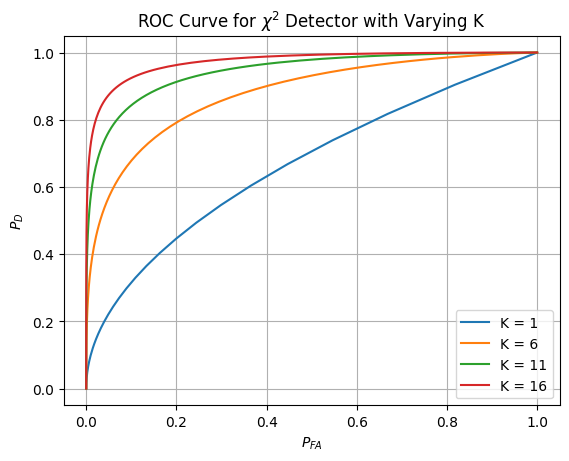

In [38]:
threshold = np.linspace(0, 100, 500)

for K in range(1,20, 5):
    df = 2 * K  # Frihetsgrader for kompleks kjikvadrat
    PFa = 1 - chi2.cdf(2*threshold / sigmaW, df=df)
    PD  = 1 - chi2.cdf(2*threshold / (sigmaW + sigmaS), df=df)
    plt.plot(PFa, PD, label=f'K = {K}')


plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.title('ROC Curve for $\chi^2$ Detector with Varying K')
plt.grid(True)
plt.legend()
plt.grid(True)
plt.show()

## Task 6

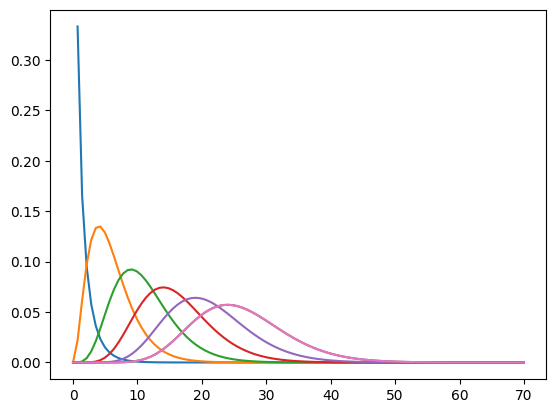

In [54]:
# threshold = np.linspace(0, 100, 500)

# k = 30

# #Exact PD and PFa
# PD = 1 - chi2.cdf((2*threshold)/(sigmaS + sigmaW), 2)
# PFa = 1 - chi2.cdf((2*threshold)/(sigmaW), 2)

x = np.linspace(0, 70, 100)
for k in range(1,30, 5):
    chi = chi2.pdf(x, k)
    plt.plot(x, chi)

norm = norm.pdf(30)
plt.plot(x, chi)
plt.show()
